<a href="https://colab.research.google.com/github/Tahsinul7/Flu-Shot-Learning-Predict-H1N1-and-Seasonal-Flu-Vaccines-HOSTED-BY-DRIVENDATA/blob/main/H1h1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/H1N1/

/content/drive/MyDrive/H1N1


Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_trainfeatures = pd.read_csv('training_set_features.csv', index_col=['respondent_id'])
df_trainlabels = pd.read_csv('training_set_labels.csv', index_col=['respondent_id'])

Looking at the data
each row of the dataframe contains one observation of a person from 26707 people who took part in this survey and there are 35 features, and the two labels are h1n1_vaccine and seasonal_vaccine if each person have taken them or not

In [4]:
print("df_trainfeatures.shape", df_trainfeatures.shape)
print("df_trainlabels",df_trainlabels.shape)

df_trainfeatures.shape (26707, 35)
df_trainlabels (26707, 2)


In [5]:
df_trainlabels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [77]:
df_trainfeatures.head(5)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Features contain columns which contains string values, lets check out the data types of our features

In [238]:
df_trainfeatures.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

Lets join the features and labels into one DataFrame

In [6]:
df_train = df_trainfeatures.join(df_trainlabels)
df_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### EDA

Taking a look of the missing values in the dataset

In [243]:
df_train.isna().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_seasonal            2160
doctor_recc_h1n1                2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

Instead of seeing numbers lets plot them.
We can see there are some columns which stands out

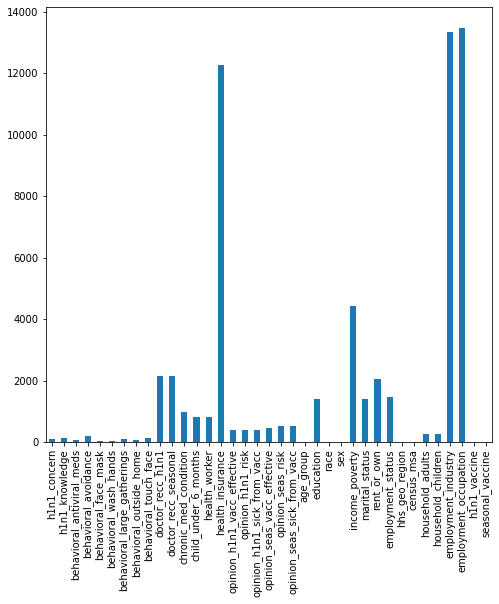

In [244]:
plt.figure(figsize=(8,8))
df_train.isna().sum().plot(kind = 'bar')

plt.show()


Lets check the proportion of people taking both the vaccines

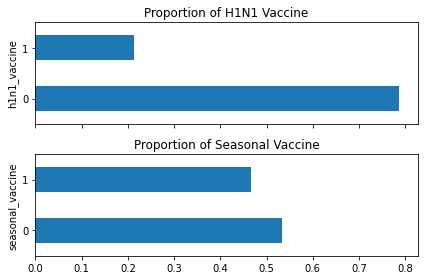

In [249]:
fig, ax = plt.subplots(2, 1, sharex=True)

total_obv = df_train.shape[0]

(df_train['h1n1_vaccine']
    .value_counts()
    .div(total_obv)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(df_train['seasonal_vaccine']
    .value_counts()
    .div(total_obv)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()


We can there is big  class imbalance in h1n1 vaccine being taken, almost 80% haven't taken the h1n1 vaccine.

More people have  taken seasonal vaccine than h1n1 vaccine.


In [ ]:
sns.countplot( x= df_train.h1n1_concern.astype('category'), hue = df_train.h1n1_vaccine.astype('category'))
plt.show()

In [37]:
df_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'household_adults',
       'household_children', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

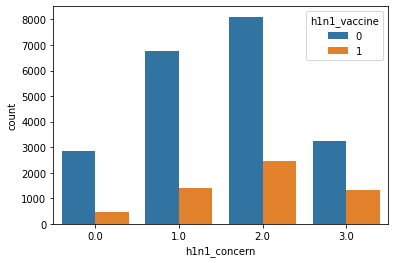

In [47]:
sns.countplot( x= df_train.h1n1_concern.astype('category'), hue = df_train.h1n1_vaccine.astype('category'))
plt.show()

We can see more concern people did take more h1n1 vaccine, but there isnt a clear picture due to proportions not being taken into account.

In [65]:
df_train.groupby(['h1n1_concern','h1n1_vaccine']).size().unstack('h1n1_vaccine')

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


In [64]:
h1n1_concern_counts = df_train.groupby('h1n1_concern').size()

In [67]:
proportions = df_train.groupby(['h1n1_concern','h1n1_vaccine']).size().unstack('h1n1_vaccine').div(h1n1_concern_counts,axis ='index')
proportions

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


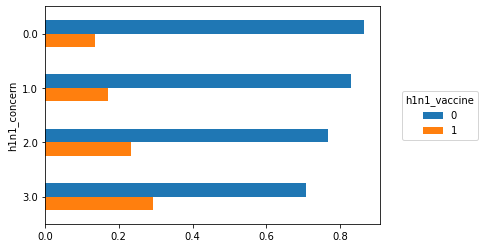

In [69]:
ax = proportions.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)
plt.show()

Now it is showing a clear picture, more concerned people are indeed taking more h1n1_vaccines! Lets do some modeling!

### Building Models

To build our machine learning model, we need make sure to deal with the categorical columns, remove missing values, before we can feed it to a estimator

### Dealing with Categorical Variable

First we look at columns with 'obj' datatype.

In [ ]:
df_train.select_dtypes(include =['object'])

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


Now there are a number of option on how we want to process these columns.
We can ordinal encode, the age group, education , income_poverty or just use pandas get_dummies to one hot encode the variables, however get dummies, doesnt work well when using pipelines


We will use One hot encoding, for that we need convert obj data type to category dtype, for that we write a function, since we have to apply similar process on our holdout set.

In [7]:
def cat(df):
  for col in df:
    if df[col].dtypes == 'O':
      df[col] = df[col].astype('category')
    else:
       df
  
  

  

In [8]:
cat(df_train)
    
     
     
  

We can see the obj datatypes are converted to category dtypes.

In [9]:
df_train.dtypes

h1n1_concern                    float64
h1n1_knowledge                  float64
behavioral_antiviral_meds       float64
behavioral_avoidance            float64
behavioral_face_mask            float64
behavioral_wash_hands           float64
behavioral_large_gatherings     float64
behavioral_outside_home         float64
behavioral_touch_face           float64
doctor_recc_h1n1                float64
doctor_recc_seasonal            float64
chronic_med_condition           float64
child_under_6_months            float64
health_worker                   float64
health_insurance                float64
opinion_h1n1_vacc_effective     float64
opinion_h1n1_risk               float64
opinion_h1n1_sick_from_vacc     float64
opinion_seas_vacc_effective     float64
opinion_seas_risk               float64
opinion_seas_sick_from_vacc     float64
age_group                      category
education                      category
race                           category
sex                            category


In [81]:
df_train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,0.0,White,Female,0.0,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1.0,White,Male,0.0,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,0,3.0,White,Male,1.0,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,4,1.0,White,Female,0.0,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,2,2.0,White,Female,1.0,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


We get rid of 'hhs_geo_region', 'census_msa' as these contains data which arent useful to encode.

We also drop 'employment_industry', 'employment_occupation' because they have majority of missing data

In [10]:
df_train = df_train.drop(columns =['hhs_geo_region','census_msa','employment_industry','employment_occupation'])


In [11]:
df_train.isnull().sum().sort_values()

seasonal_vaccine                   0
sex                                0
race                               0
age_group                          0
h1n1_vaccine                       0
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_antiviral_meds         71
behavioral_outside_home           82
behavioral_large_gatherings       87
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_touch_face            128
behavioral_avoidance             208
household_children               249
household_adults                 249
opinion_h1n1_risk                388
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
health_worker                    804
child_under_6_months             820
chronic_med_condition            971
education                       1407
marital_status                  1408
e

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [13]:
 from sklearn.experimental import enable_iterative_imputer 

 from sklearn.impute import IterativeImputer
 from sklearn.impute import KNNImputer
 from sklearn.preprocessing import OneHotEncoder

In [17]:
from sklearn.model_selection import GridSearchCV

Now we make our pipeline, first imputing the missing, then one hot encoding the categorical variables, finally using Logestic Regression as our Classifier

In [14]:
steps = [
         ('Simple_imputer', SimpleImputer(strategy='most_frequent')),
         ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('logreg', MultiOutputClassifier(estimator=LogisticRegression()))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)


In [15]:
X =df_train.drop(columns=['h1n1_vaccine','seasonal_vaccine'])
y =df_train[['h1n1_vaccine','seasonal_vaccine']]

We split them into training and testing data, ensuring on using the stratify = True parameter, which will split the classes evenly

In [16]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,shuffle=True, test_size = 0.3, random_state =42)

In [18]:
parameters ={'logreg__estimator__C':np.linspace(1.5,2,10) }

We use gridsearch CV for hyperparamter Tuning, picking the best C value in the defined range

In [19]:
cv = GridSearchCV(pipeline,param_grid =parameters)

In [ ]:
cv.fit(X_train,y_train)

We want the probabilities of our prediction, not the binary 0,1 prediction, hence we use the predict_proba function

In [22]:
preds = cv.predict_proba(X_test)

In [23]:
print("test_probas[0].shape", preds[0].shape)
print("test_probas[1].shape", preds[1].shape)

test_probas[0].shape (8013, 2)
test_probas[1].shape (8013, 2)


In [24]:
y_preds_df = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_test.index)

In [25]:
y_preds_df.head(2)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
7572,0.031811,0.043738
3586,0.123806,0.437308


## This competition submission uses ROC_AUC score as metric.

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [30]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

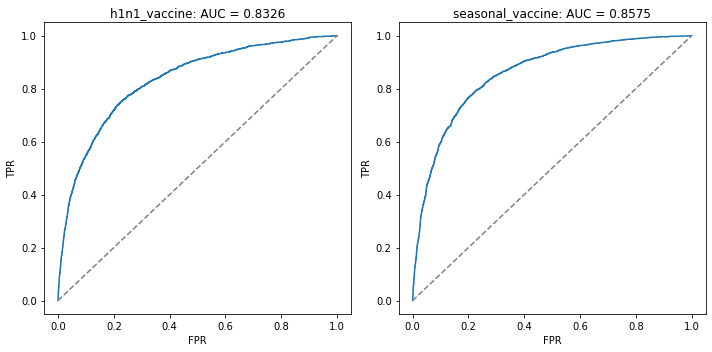

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_roc(y_test['h1n1_vaccine'],y_preds_df['h1n1_vaccine'],'h1n1_vaccine', ax=ax[0])
plot_roc(y_test['seasonal_vaccine'],y_preds_df['seasonal_vaccine'],'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

We can see our model performed better predicting seasonal vaccine, 
now lets take the average using scikit learn roc_auc_score, which supports multilabel predictions

In [36]:
roc_auc_score(y_test, y_preds_df)#Logistic Regression

0.8450608449423009

I have tried using other models, such as SVM, Decision Trees, however they didnt perform better than Logistic Regression

### TEST/HOLDOUT SET

In [221]:
test_features_df = pd.read_csv('test_set_features.csv',index_col='respondent_id')
cat(test_features_df) #applying same preprocessing step.

In [223]:
test_features_df = test_features_df.drop(columns =['hhs_geo_region','census_msa','employment_industry','employment_occupation'])


In [224]:
test_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,1.0,0.0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,3.0,0.0
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,1.0,0.0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,1.0,0.0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,0.0,1.0


Retraining the model on the overall dataset, before testing on the holdout set

In [ ]:
cv.fit(X,y)

Predicting on the Holdout test set!

In [226]:
test_probas = cv.predict_proba(test_features_df)

In [227]:
submission_df  = pd.read_csv('submission_format.csv',index_col = 'respondent_id')

In [228]:
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

In [229]:
submission_df.to_csv('my_submission2.csv', index=True)

In [230]:

from google.colab import files

In [232]:
files.download('my_submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Submitting on the leaderboard does show a better score with Logistic Regression, in drivendata website

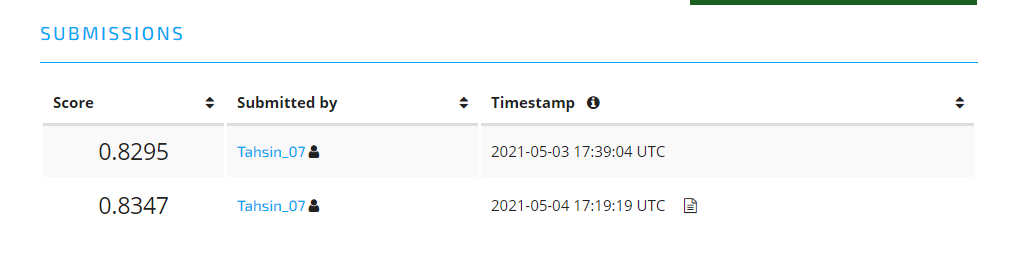